In [62]:
import numpy as np
import matplotlib.pyplot as plt
from Library.Random import*
from tqdm import trange

# Q.1

# <h3> Generate random numbers in range [0,1] using multiplicative linear congruential generator defined by $x_n = (a x_n−1)\%m$ using 
# <h3>  (i) a = 65, m = 1021 and (ii) a = 572, m = 16381.

In [63]:
#find the random number using LCG
a1, m1, a2, m2 = 65, 1021, 572, 16381
x1 = lcg(seed = 10,a = a1, c = 0, n = 10, m = m1)
x2 = lcg(seed = 10, a = a2, c = 0, n = 10, m = m2)
print(f"The random number generated using LCG with a = {a1}, m = {m1} is", np.array(x1))
print()
print(f"The random number generated using LCG with a = {a2}, m = {m2} is", np.array(x2))

The random number generated using LCG with a = 65, m = 1021 is [0.63663075 0.38099902 0.76493634 0.7208619  0.85602351 0.64152791
 0.6993144  0.45543585 0.60333007 0.21645446]

The random number generated using LCG with a = 572, m = 16381 is [0.34918503 0.73383798 0.75532629 0.0466394  0.6777364  0.6652219
 0.50692876 0.96325011 0.97906111 0.02295342]


# Q.2

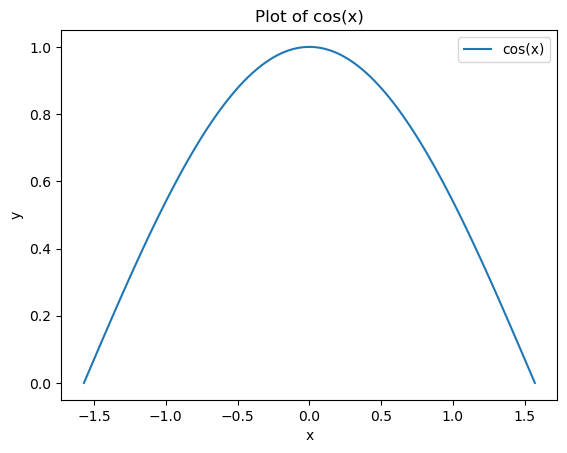

In [64]:
#define a function 
def f(x):
    return np.cos(x)

#plot the function
x = np.linspace(-np.pi/2, np.pi/2, 100)
y = f(x)
plt.plot(x, y, label = 'cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of cos(x)')
plt.legend()
plt.show()

In [65]:
n = 100000
#first LCG case
k1 = monte_carlo_integration(a = -np.pi/2, b = np.pi/2, n = n, seed = 10, a_lcg = a1, c_lcg = 0, m_lcg = m1)
print(f"The value of the integral wih n = {n} is", k1)

The value of the integral wih n = 100000 is 2.002075190778928


100%|██████████| 99/99 [00:07<00:00, 13.12it/s]


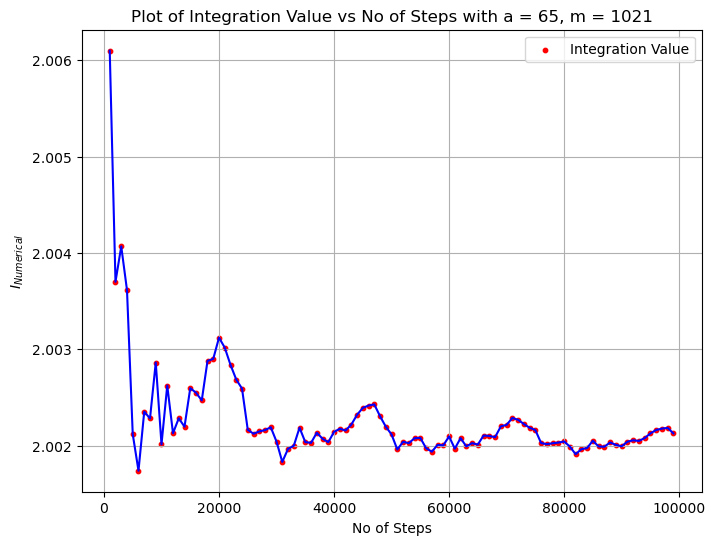

In [66]:
#check the convergence of the integral
xlist = []
ylist = []
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for i in trange(1000,100000,1000):
    xlist.append(i)
    ylist.append(monte_carlo_integration(a = -np.pi/2, b = np.pi/2, n = i, seed = 10, a_lcg = a1, c_lcg = 0, m_lcg = m1))

plt.plot(xlist,ylist,color='blue')
plt.scatter(xlist,ylist,color='red',s=10,label='Integration Value')
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Numerical}$')
plt.title(f'Plot of Integration Value vs No of Steps with a = {a1}, m = {m1}')
plt.grid()
plt.legend()
plt.show()

In [67]:
#second LCG case
k2 = monte_carlo_integration(a = -np.pi/2, b = np.pi/2, n = n, seed = 10, a_lcg = a2, c_lcg = 0, m_lcg = m2)
print(f"The value of the integral wih n = {n} is", k2)

The value of the integral wih n = 100000 is 1.999871389772022


 81%|████████  | 80/99 [00:04<00:01,  9.94it/s]

100%|██████████| 99/99 [00:07<00:00, 13.41it/s]


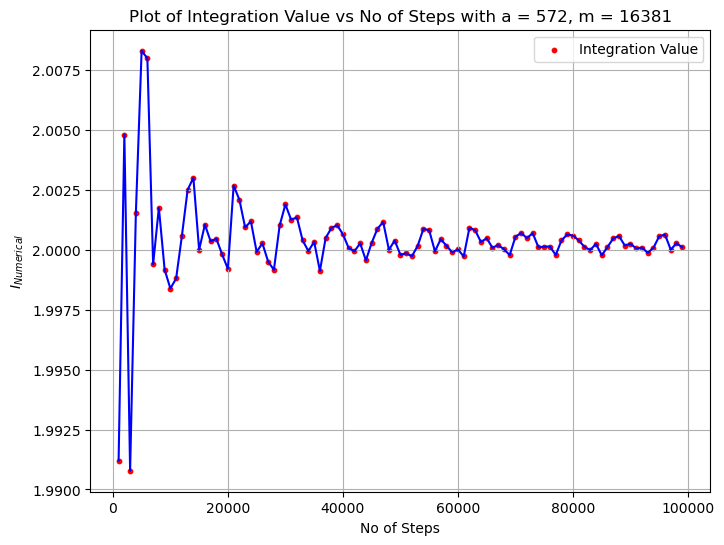

In [68]:
#check the convergence of the integral
xlist = []
ylist = []
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for i in trange(1000,100000,1000):
    xlist.append(i)
    ylist.append(monte_carlo_integration(a = -np.pi/2, b = np.pi/2, n = i, seed = 10, a_lcg = a2, c_lcg = 0, m_lcg = m2))

plt.plot(xlist,ylist,color='blue')
plt.scatter(xlist,ylist,color='red',s=10,label='Integration Value')
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Numerical}$')
plt.title(f'Plot of Integration Value vs No of Steps with a = {a2}, m = {m2}')
plt.grid()
plt.legend()
plt.show()

# <h4> Do the integration by choosing a, m used in Numerical Recipes

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:08<00:00, 11.43it/s]


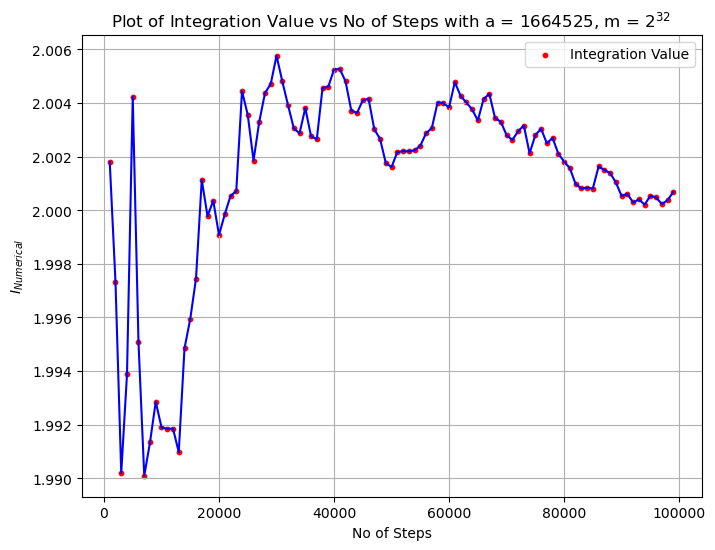

In [69]:
#check the convergence of the integral with the a, m values used in Numerical Recipes
xlist = []
ylist = []
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for i in trange(1000,100000,1000):
    xlist.append(i)
    ylist.append(monte_carlo_integration(a = -np.pi/2, b = np.pi/2, n = i, seed = 10, a_lcg = 1664525, c_lcg = 0))

plt.plot(xlist,ylist,color='blue')
plt.scatter(xlist,ylist,color='red',s=10,label='Integration Value')
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Numerical}$')
plt.title('Plot of Integration Value vs No of Steps with a = 1664525, m = $2^{32}$')
plt.grid()
plt.legend()
plt.show()

# Q.3

# Q.4